# A* Shortest Path Algorithm

The A* algorithm uses weighted edges and an estimated distance (heuristic) to find a path between two single nodes. A* tends to be faster to run since it doesn’t look at all options, only the most promising option towards the target node.


- A* uses a heuristic, which is an estimated distance from the node to the target node based on additional outside data (e.g. as-the-crow-flies distance).
- This implementation uses a euclidean heuristic, which uses the given location of each point to calculate the euclidean distance between each node and the target node.
- H-Distance, or heuristic distance, is the distance plus the heuristic at the next node. The heuristic represents the estimated distance from the next node to the target. (H-Distance = heuristic + distance).
- The A* algorithm does not explore all paths, instead it uses the additional information of the heuristic to decide which path to follow. It’s common for the A* algorithm to not evaluate every node.




In [9]:
from math import inf, sqrt
from heapq import heappop, heappush
from visualization import visualize_graph


class graph_vertex:
  """
    A class representing a vertex in the graph.

    Attributes:
        name (str): The name of the vertex.
        position (tuple): The (x, y) coordinates of the vertex on a 2D plane.
  """
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

# Example Graph
#create nodes with (x, y) locations
a = graph_vertex("A", 0, 2)
b = graph_vertex("B", 1, 4)
c = graph_vertex("C", 1, 1)
d = graph_vertex("D", 2, 2)
e = graph_vertex("E", 4, 1)
f = graph_vertex("F", 5, 3)
g = graph_vertex("G", 6, 1)

#add weighted edges between nodes
graph = {
  a: set([(b, 3), (c, 4)]),
  b: set([(a, 3), (d, 5)]),
  c: set([(a, 4), (d, 7)]),
  d: set([(b, 5), (c, 7), (e, 9), (f, 8)]),
  e: set([(d, 8), (g, 6), (f, 3)]),
  f: set([(d, 9), (g, 4), (e, 3)]),
  g: set([(e, 6), (f, 4)])
}

In [10]:
# Euclidean Heuristic:
def heuristic(start, target):
  """
    Heuristic function for A* algorithm, calculates the Euclidean distance between two vertices.

    Parameters:
        start (graph_vertex): The current node.
        target (graph_vertex): The target node.

    Returns:
        float: The Euclidean distance between the current and target nodes.
  """
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return sqrt(x_distance * x_distance + y_distance * y_distance)

def a_star(graph, start, target):
    """
    Implements the A* search algorithm to find the shortest path between two vertices in a graph.

    Parameters:
        graph (dict): A dictionary representing the graph where keys are vertices and values are sets of tuples (neighbor, edge_weight).
        start (graph_vertex): The starting vertex for the path.
        target (graph_vertex): The target vertex for the path.

    Returns:
        list: The shortest path from start to target as a list of vertex names.
    """
    print("Starting A* algorithm!")

    # Initialize a dictionary to store the total cost (distance) and path for each vertex.
    # The cost is initially set to infinity for all vertices except the start vertex.
    paths_and_distances = {}
    for vertex in graph:
        paths_and_distances[vertex] = [inf, [start.name]]
    paths_and_distances[start][0] = 0

    # A priority queue to determine the next vertex to visit based on the estimated cost.
    vertices_to_explore = [(0, start)]

    # The algorithm runs until there are no vertices left to explore or the target is reached.
    while vertices_to_explore and paths_and_distances[target][0] == inf:
        # Pop the vertex with the lowest cost estimate.
        current_distance, current_vertex = heappop(vertices_to_explore)

        # Explore the neighbors of the current vertex.
        for neighbor, edge_weight in graph[current_vertex]:
            # Calculate the new cost (distance) to the neighbor.
            new_distance = current_distance + edge_weight + heuristic(neighbor, target)
            # print(f"{neighbor.name}, {heuristic(neighbor, target)}")
            new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
            
            # If the new cost is lower than the previously recorded cost, update the cost and path.
            if new_distance < paths_and_distances[neighbor][0]:
                paths_and_distances[neighbor][0] = new_distance
                paths_and_distances[neighbor][1] = new_path
                # Add the neighbor to the priority queue with the updated cost.
                heappush(vertices_to_explore, (new_distance, neighbor))
                
    # Once the target is reached, or all vertices are explored, return the shortest path found.
    print("Found a path from {0} to {1}: ".format(start.name, target.name), paths_and_distances[target][1])
    return paths_and_distances[target][1]

# Run the A* algorithm on the example graph
shortest_path = a_star(graph, a, g)

Starting A* algorithm!
Found a path from A to G:  ['A', 'B', 'D', 'F', 'G']


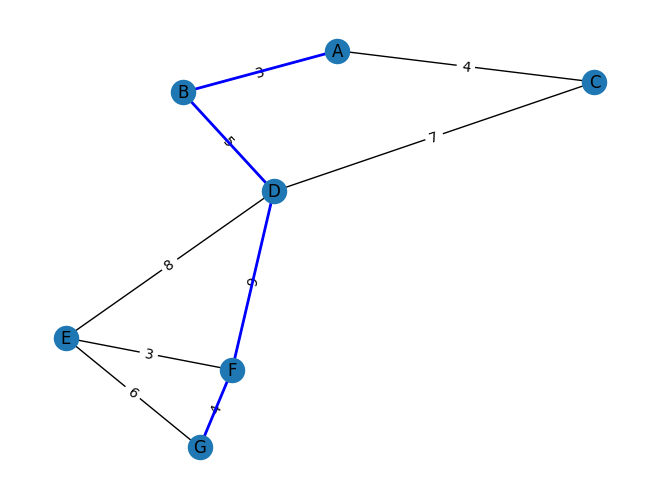

In [11]:
def create_edge_dict(graph):
  """
    Converts a graph into a dictionary for edge visualization.

    Parameters:
        graph (dict): A dictionary representing the graph.

    Returns:
        dict: A dictionary where keys are tuples (start_vertex_name, end_vertex_name) and values are edge weights.
  """
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict

# Visualization of the graph
graph_edge_dict = create_edge_dict(graph) # create the edge dictionary
visualize_graph(graph_edge_dict, shortest_path) #plot the graph and the shortest path